# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

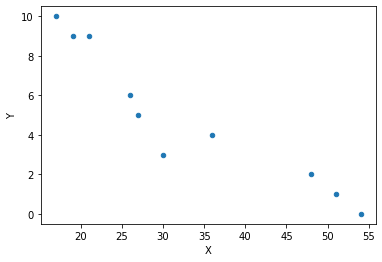

In [2]:
# Your code here.
import matplotlib.pyplot as plt
student_data.plot('X','Y',kind='scatter')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. Sí se ve una tendencia o relación negativa entre la edad y en si llegan tarde o no, es decir, mientras más jóvenes más retardos tienen.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
import numpy as np
np.cov(student_data.T)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [5]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [6]:
#La covarianza entre la edad y los retardos es igual a -45.57 y la correlación entre estas dos variables es -0.939. La correlación puede tomar valores que van de -1 a 1, donde miestras más se acerca a 1 la relación entre la dos variables es positiva y miestras más se acerca a -1 la relación entre las dos variables es negativa. En este caso la correlación de -.939 nos indica que existe una relación negativa fuerte entrre las dos variables. Los valores de covarianza no están estandarizados. Por consiguiente, la covarianza puede ir desde infinito negativo hasta infinito positivo.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
import statsmodels.api as sm

In [8]:
X=sm.add_constant(student_data.X)

In [9]:
Y=student_data.Y

In [10]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        18:16:10   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\garci\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
#Se hizo un modelo de mínimos cuadrados ordinarios (OLS) utilizando el módulo statsmodel. La variable dependiente (Y) son los retardos y la variable independiente (X) es la edad. El coeficiente de X calculado (-0.2428) nos indica que existe una relación negativa entre los retardos y la edad y que es estadísticamente significativa esta relación ya que el p-value de la prueba t es menor a 0.05. El modelo tiene una bandad de ajuste (R^2) de 88.2%, lo cual se considera un buen modelo. 

Plot your regression model on your scatter plot.

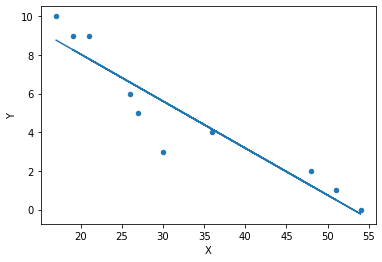

In [12]:
# Your code here.
student_data.plot('X','Y',kind='scatter')
plt.plot(student_data.X,12.8888-0.2428*student_data.X)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# Your response here: El coeficiente de X calculado (-0.2428) nos indica que existe una relación negativa entre los retardos y la edad y que es estadísticamente significativa esta relación ya que el p-value de la prueba t es menor a 0.05. El modelo tiene una bandad de ajuste (R^2) de 88.2%, lo cual se considera un buen modelo. En la gráfica se observa que la línea que se estima con el modelo OLS pasa entre los puntos de la gráfica de la dispersión y representa la relación lineal que existe entre los retardos y la edad. Yo sí considero que la edad es una buena variable para predecir o pronosticar los retrasos. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import any libraries you may need & the data
carros=pd.read_csv('vehicles.csv')
carros.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Your response here. 
carros[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [16]:
#La variable que puede ser la más importante para determinar las emisiones CO2 es "Fuel Barrels/Year" porque es la que tiene la correlación más alta con las emisiones de CO2 (0.986). La variable que provee menos información  útil es el año porque tiene la correlación más baja con los emisiones de CO2 (-0.22). 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here.
X=sm.add_constant(carros[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

In [18]:
Y=carros['CO2 Emission Grams/Mile']

In [19]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                             18:16:36   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [20]:
#Se utilizo un modelo de mínimos cuadrados ordinarios (OLS) donde la variable dependiente es la emisión de CO2 y las variables independientes explicativas son el año, los cilindros, los barriles de combustible, el MPG y el costo de combustible. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. Todas las variables explicativas quedaron significativas porque su p-value es menor a 0.05. La variable que tiene el coeficiente más alto es "Fuel Barrels/year", lo cual no es sorprendente porque es también la que tenía el coeficiente de correlación más alto. La bondad de ajuste (R^2) del modelo es de 0.981, lo cual es muy cercano a 1 indicando que el modelo construído es bueno.  

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 